## Example 3 - Divergence, Overflow and Understanding Learning Rate
$$ h(x) = x^5 - 2x^4 +2 $$

### Effect Of Choosing Initial_Guess
We will see for different initial guess, we get different result, and for some initial guess, we might even run to infinite loop.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [10]:
# Gradient Descent Algorithm

def gradient_descent(derivative_function,initial_guess,steps_multiplier,precision,max_iter=300):
    new_x = initial_guess
    new_x_list = [new_x]
    slopes_list = [derivative_function(new_x)]
    
    #The main algorithm
    for i in range (max_iter):
        prev_x = new_x
        gradient = derivative_function(prev_x)
        new_x = prev_x - (gradient*steps_multiplier)
        new_x_list.append(new_x)
        slopes_list.append(derivative_function(new_x))
        step_size = abs(prev_x - new_x)
        if step_size < precision:
            break
    return new_x,new_x_list,slopes_list


## Plot The Functions 

### Initial Guess at 0.2

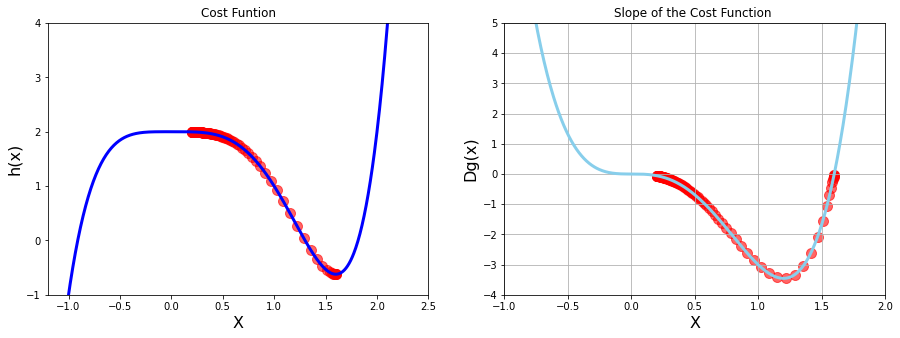

In [11]:
# Starting value is 0.1

#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_function=dh,initial_guess=0.2,steps_multiplier=0.02,precision=0.001)
#Plot function and derivative scatterplot side by side
#1. Chart : Cost function

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Cost Funtion")
plt.plot(x_3,h(x_3),color='blue',linewidth=3)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize=16)


#showing gradient descent in the cost function
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)





# Chart 2 - Showing how our x_1 and its gradients and how the gradient descent algo moved our x_1 and gradients in this
# plot
plt.subplot(1,2,2)
plt.title("Slope of the Cost Function ")
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=3)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('Dg(x)', fontsize=16)

#showing gradient descent in the slope chart
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.6)

# plt.scatter(list_x,dg(np.array(list_x)),color='red',s=100,alpha=0.6)


In [8]:
print(f"Local minima : {local_min}, Cost at minima : {h(local_min)}, Number of steps : {len(list_x)}")

Local minima : 1.5989534547394717, Cost at minima : -0.6214287992331258, Number of steps : 117


### Initial Guess at -0.2, Runs to infinity if max_iter is more than 71

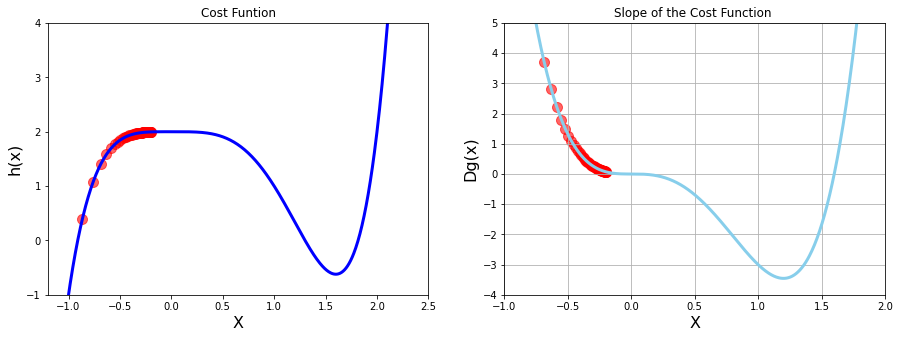

In [80]:
# If max iter more than 71, we get error as it tends to move to negative infinity

#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_function=dh,initial_guess=-0.2,steps_multiplier=0.02,precision=0.001,max_iter=71)
#Plot function and derivative scatterplot side by side
#1. Chart : Cost function

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Cost Funtion")
plt.plot(x_3,h(x_3),color='blue',linewidth=3)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize=16)


#showing gradient descent in the cost function
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)





# Chart 2 - Showing how our x_1 and its gradients and how the gradient descent algo moved our x_1 and gradients in this
# plot
plt.subplot(1,2,2)
plt.title("Slope of the Cost Function ")
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=3)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('Dg(x)', fontsize=16)

#showing gradient descent in the slope chart
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.6)

# plt.scatter(list_x,dg(np.array(list_x)),color='red',s=100,alpha=0.6)


In [48]:
#Max Size Of Float in python for this machine
# import sys
# # help(sys)
# # sys.version
# type(h(local_min))
# sys.float_info.max 


## Part 2 : Understanding and Visualising Learning Rate 

### using the function from gradient descent multiple minima (Example 2)

In [50]:
import numpy as np

x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

#### Starting value is 1.9 ... Step Size or step multiplier is 0.25 , Max iter set to 5 and later try with 500

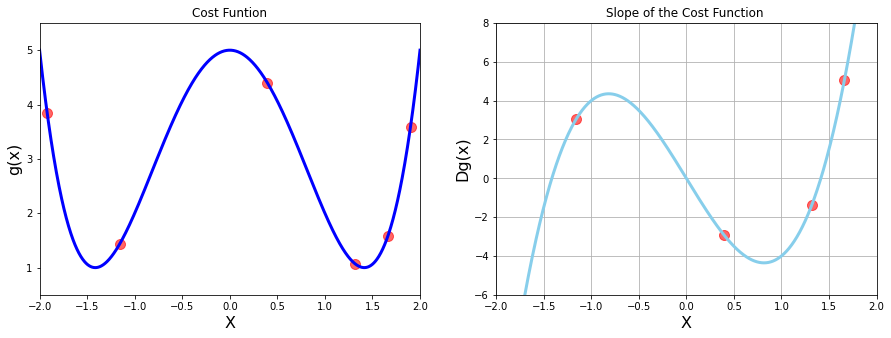

In [64]:


#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_function=dg,initial_guess=1.9,steps_multiplier=0.25,precision=0.001,max_iter=5)
#Plot function and derivative scatterplot side by side
#1. Chart : Cost function

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Cost Funtion")
plt.plot(x_2,g(x_2),color='blue',linewidth=3)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize=16)


#showing gradient descent in the cost function
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)





# Chart 2 - Showing how our x_1 and its gradients and how the gradient descent algo moved our x_1 and gradients in this
# plot
plt.subplot(1,2,2)
plt.title("Slope of the Cost Function ")
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('Dg(x)', fontsize=16)

#showing gradient descent in the slope chart
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.6)

# plt.scatter(list_x,dg(np.array(list_x)),color='red',s=100,alpha=0.6)


In [57]:
print(f"Number of steps {len(list_x)}")

Number of steps 501


### Running Gradient Descent 3 Times, For Low, mid and high Learning Rate
Max Iter = 1, Learning rate = Low gamma 0.0005,mid gamma 0.001, high gamma 0.002

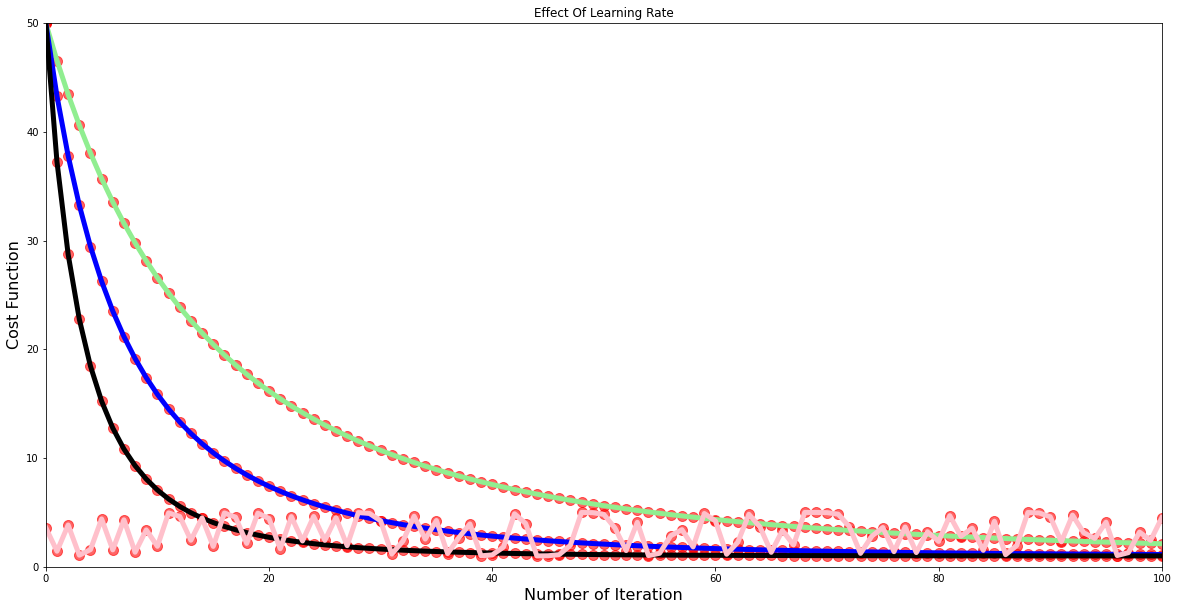

In [96]:
# Visualizing learning rate's effect

n = 100    #Max iter set to n

plt.figure(figsize=(20,10))
plt.title("Effect Of Learning Rate")
plt.xlim(0,n)
plt.ylim(0,50)
plt.xlabel('Number of Iteration', fontsize = 16)
plt.ylabel('Cost Function', fontsize=16)

list_x_iter = list(range(0,n+1))


#Low Gamma - Learning rate 0.0005
low_gamma  = gradient_descent(derivative_function=dg,initial_guess=3,steps_multiplier=0.0005,precision=0.0001,max_iter=n)
plt.plot(list_x_iter,g(np.array(low_gamma[1])),color='lightgreen',linewidth=5)
plt.scatter(list_x_iter,g(np.array(low_gamma[1])),color='red',s=100,alpha=0.6)



# Mid Gamma - Learning rate 0.001
mid_gamma  = gradient_descent(derivative_function=dg,initial_guess=3,steps_multiplier=0.001,precision=0.0001,max_iter=n)
plt.plot(list_x_iter,g(np.array(mid_gamma[1])),color='blue',linewidth=5)
plt.scatter(list_x_iter,g(np.array(mid_gamma[1])),color='red',s=100,alpha=0.6)




#High Gamma - Learning rate 0.002
high_gamma  = gradient_descent(derivative_function=dg,initial_guess=3,steps_multiplier=0.002,precision=0.0001,max_iter=n)
plt.plot(list_x_iter,g(np.array(high_gamma[1])),color='black',linewidth=5)
plt.scatter(list_x_iter,g(np.array(high_gamma[1])),color='red',s=100,alpha=0.6)



#Insane High Gamma - Learning rate 0.25
insane_gamma  = gradient_descent(derivative_function=dg,initial_guess=1.9,steps_multiplier=0.25,precision=0.0001,max_iter=n)
plt.plot(list_x_iter,g(np.array(insane_gamma[1])),color='pink',linewidth=5)
plt.scatter(list_x_iter,g(np.array(insane_gamma[1])),color='red',s=100,alpha=0.6)

#Insane low Gamma - Learning rate 0.25
# insane_gamma  = gradient_descent(derivative_function=dg,initial_guess=1.9,steps_multiplier=0.00001,precision=0.0001,max_iter=n)
# plt.plot(list_x_iter,g(np.array(insane_gamma[1])),color='black',linewidth=5)
# plt.scatter(list_x_iter,g(np.array(insane_gamma[1])),color='red',s=100,alpha=0.6)


plt.show()






So we can see, if learning rate high, it will diverge quickly and if low,it will take a very long time to find minima
also if learning rate very insanely high,it will bounce back and forth and wont find minima as it will skip it. And if it's insanely low, it may take the algo forever to diverge and find minima.